<a href="https://colab.research.google.com/github/CristianSuarez77/RegresionLineal_Platzi/blob/main/Problema_de_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este es un problema para poder predecir el precio de un inmueble, teniendo en cuenta datos como la criminalidad del sector, tamaño, # de baños,etc.

In [2]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [4]:
train_data.shape # tenemos 404 con 13 variables

(404, 13)

In [5]:
train_targets.shape

(404,)

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Tenemos que normalizar estos datos, ya que hay # muy pequeños y otros muy grandes, y la red puede darle mayor importancia(peso) a esos numeros, cuando en realidad son solo una caracteristica de esa variable

In [7]:
train_targets[0] #esa casa cuesta 15.2 dolares

np.float64(15.2)

Un proceso de normalizacion sencilla que es restar la media y dividir por la desviacion estandar

## Normalización

In [8]:
mean = train_data.mean(axis=0) # decimos que la media en train_data en la media por el eje cero va a ser igual a la media
train_data = train_data - mean
std = train_data.std(axis=0) #std-> desviacion estandar
train_data = train_data / std # con esto normalizamos todos nuestros datos de 0 a 1

test_data = test_data - mean # no se saca los atributos de test_data porque con la data de test es con los que voy a entrenar no le deberia darle info..
test_data = test_data / std # de otros datos, porque se supone que no la tengo y solo la veo hasta que evalue mis modelos

Vamos a crear una funcion que se capaz de entregar modelos de datos, porque ya no voy a evaluar solo sobre un set de entrenamiento sino voy a hacer croos_validation o kfolvalidation( rotar todo mi set de validaciuon en todo mi set de entrenamiento) muy utilizado en machine learning

In [9]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1)) #esta ultima capa me da el resultado pero no es una clasificacion, me va a dar un numero (el valor de la casa) un numero continuo..
                           # lo que quiere decir que tiene una estructura lineal, y como es lineal no necesita una capa  de activacion (solo a esta ultima)
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

Loss-> funcion de perdida, esta funcion de perdida no me va a clasificar no vale que sea cross_entropy, pero si sirve que sea el error cuadratico medio(mse)
por ultimo se crea una metrica de presicion, para el caso de las regresiones no va a haber accuracy pero si va a haber el mean absolut error (mae) como se trabaja en regeresion lineal

Ahora vamos a hacer el Kfol_validation o iterar sobre nuestro set de entrenamiento el set de validacion, porque no quiero una validacion fija quiero que la validacion vaya cambiando en el set de entrenamiento

In [10]:
k = 4                                  # quiero dividirlo en 4 sets de validacion o iteraciones
num_val_samples = len(train_data) // k #num_val va a ser igual a cuantos ejemplos tengo, tengo len en train_data divido k
num_epoch = 90
all_history = []                       # vamos a guardar todas las iteraciones que vamos a hacer en el kfol validation en todas las historias

In [11]:
0*num_val_samples
(0+1) * num_val_samples # con esto va de 101 a 202 la data de validacion y el resto que funcione como entrenamiento

101

In [12]:
for i in range(k):
      print("Fold:", i)
      val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]# se crea el set de val = a train_data pero vamos a sesgarlo [desde : hasta]
      val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]# ya tenemos los sets de validacion por cada iteracion

      partial_train_data = np.concatenate( # vamos a concatenar todo lo que no es validacion
          [train_data[:i * num_val_samples], #train_data en la posicion.. i por el # ejemplos concatenbado con
           train_data[(i+1) * num_val_samples:] #train data abrimos desde i+1 por el nuemro de ejemplos y todo de ahi para alla
           ],
          axis = 0)# y esto lo vamos a concatenar a gtraves del axis cero o eje cero

      partial_train_targets = np.concatenate(
          [train_targets[:i * num_val_samples],
           train_targets[(i+1) * num_val_samples:]
           ],
          axis = 0)

      model = build_model_regression(13)
      history = model.fit(partial_train_data, partial_train_targets,
                    epochs = num_epoch,
                    batch_size = 16,
                    validation_data = (val_data, val_targets),
                    verbose = 0)
      all_history.append(history.history['val_mae'])

Fold: 0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold: 1
Fold: 2
Fold: 3


Podemos ver nuestro all_history tiene 80 resultados porque rtenemos 80 epocas, nosotros tenemos 4 lotes de a 80 respuestas, resultados en la iteracion del MAE

In [ ]:
all_history[0]

[18.405372619628906,
 14.50390911102295,
 9.597980499267578,
 5.999291896820068,
 4.425680160522461,
 3.759326934814453,
 3.484934091567993,
 3.3736841678619385,
 3.313781499862671,
 3.2749440670013428,
 2.94366717338562,
 2.9501028060913086,
 2.8129405975341797,
 2.7501468658447266,
 2.695991039276123,
 2.563469409942627,
 2.5221102237701416,
 2.6297390460968018,
 2.4352893829345703,
 2.3541629314422607,
 2.333134174346924,
 2.2549221515655518,
 2.449751138687134,
 2.159428119659424,
 2.1875903606414795,
 2.1795661449432373,
 2.084073305130005,
 2.25398850440979,
 2.1057472229003906,
 2.157884120941162,
 2.0265231132507324,
 2.1513075828552246,
 2.002133369445801,
 2.099407196044922,
 2.0264105796813965,
 1.9931832551956177,
 2.0496714115142822,
 1.955241322517395,
 2.033337354660034,
 2.0671441555023193,
 2.0129802227020264,
 2.1263480186462402,
 2.0016298294067383,
 2.193812131881714,
 1.9498906135559082,
 1.9112147092819214,
 1.9447791576385498,
 1.9516085386276245,
 2.002491474151

In [ ]:
len(all_history[0])

80

Vamos a tomar todos lo valores de las 4 iteraciones y promediarlos  

In [ ]:
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,18.405373,14.503909,9.597980,5.999292,4.425680,3.759327,3.484934,3.373684,3.313781,3.274944,...,1.906443,1.883615,1.885316,1.887214,1.950320,2.122090,2.026042,1.982367,2.005408,1.941972
1,18.010849,14.097271,9.599248,6.388093,5.092613,4.365220,3.835886,3.613510,3.442912,3.268063,...,2.578405,2.585308,2.628250,2.551913,2.664103,2.567949,2.620031,2.583211,2.585610,2.620621
2,18.200804,14.593586,10.522158,7.978242,6.302361,5.178325,4.366987,3.878901,3.620912,3.448721,...,2.428010,2.393430,2.449370,2.624004,2.466795,2.448393,2.419948,2.421419,2.424644,2.394382
3,21.271704,17.692963,13.091865,9.120085,7.015890,5.808828,4.983382,4.359196,3.976184,3.738546,...,2.455133,2.508363,2.512828,2.492511,2.575372,2.514243,2.485309,2.477595,2.464717,2.488714


Ahora cambiamos las epocas a 500


In [13]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)#vamos a pasar todo esto a un dataframwe de all_history y sacamos la media por el eje cero

In [14]:
all_mae_avg # tenemos una lista de 500 resultados del promedio de los 4

,0
0,19.075121
1,15.409881
2,11.074945
3,7.511625
4,5.609486
...,...
85,2.397657
86,2.317717
87,2.286102
88,2.395885


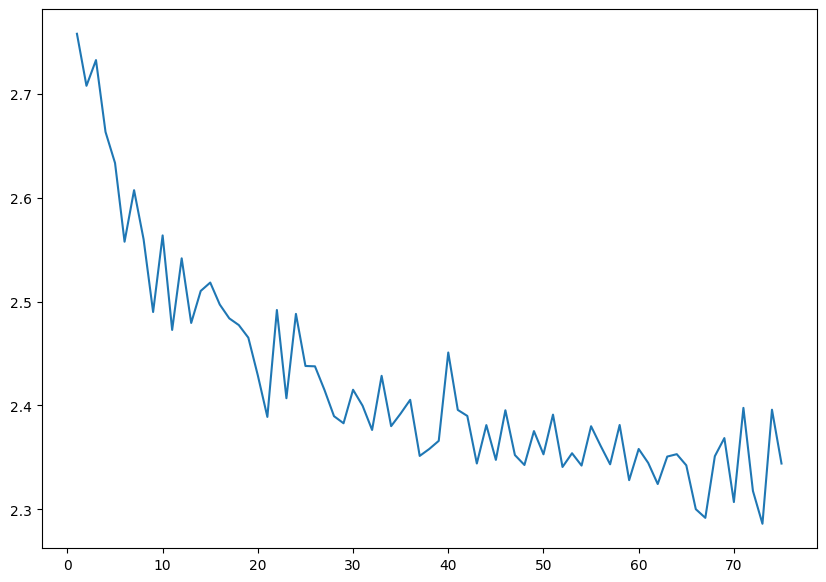

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,7))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:]) #que haga un plot con el rnago que va de 1 hatsa la longitud que tenga mi all_mae y esto suamdo mas 1 porque
                                                   #va 79 y queremos todo, ese es un eje y el que vamos a graficar es el MAE
plt.show()


In [16]:
model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 13.9359 - mae: 2.5070


[19.704723358154297, 2.733461856842041]

Tenemos un modelo con una desviacion de 2700 dolares en el precio del inmueble